In [5]:
# set ups
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

In [6]:
# choose directory, make all files into a list
# directory = '/Users/lucaszhuang1210gmail.com/Documents/GitHub/sunnyhills/data/current/processed/two_min_lightcurves'
directory = '/Users/lucaszhuang1210gmail.com/Documents/GitHub/sunnyhills/personal_epochs/lucas/test_data'
file_list = os.listdir(directory)
file_list.remove('.gitkeep')
file_list

['TIC_5714469.csv',
 'TIC_17399504.csv',
 'TIC_14087575.csv',
 'TIC_9966678.csv',
 'TIC_17251144.csv',
 'TIC_17417151.csv',
 'TIC_11568422.csv',
 'TIC_1232360.csv']

In [7]:
# save figues
def save_figure():
    # save files to folder
    # export_path = '/Users/lucaszhuang1210gmail.com/Documents/GitHub/sunnyhills/personal_epochs/lucas/light_curve_plots_two_min_lightcurves'
    export_path = '/Users/lucaszhuang1210gmail.com/Documents/GitHub/sunnyhills/personal_epochs/lucas/test_output'
    export_file_name = export_path + '/TIC_{}.png'.format(tic_id)
    fig.savefig(export_file_name)

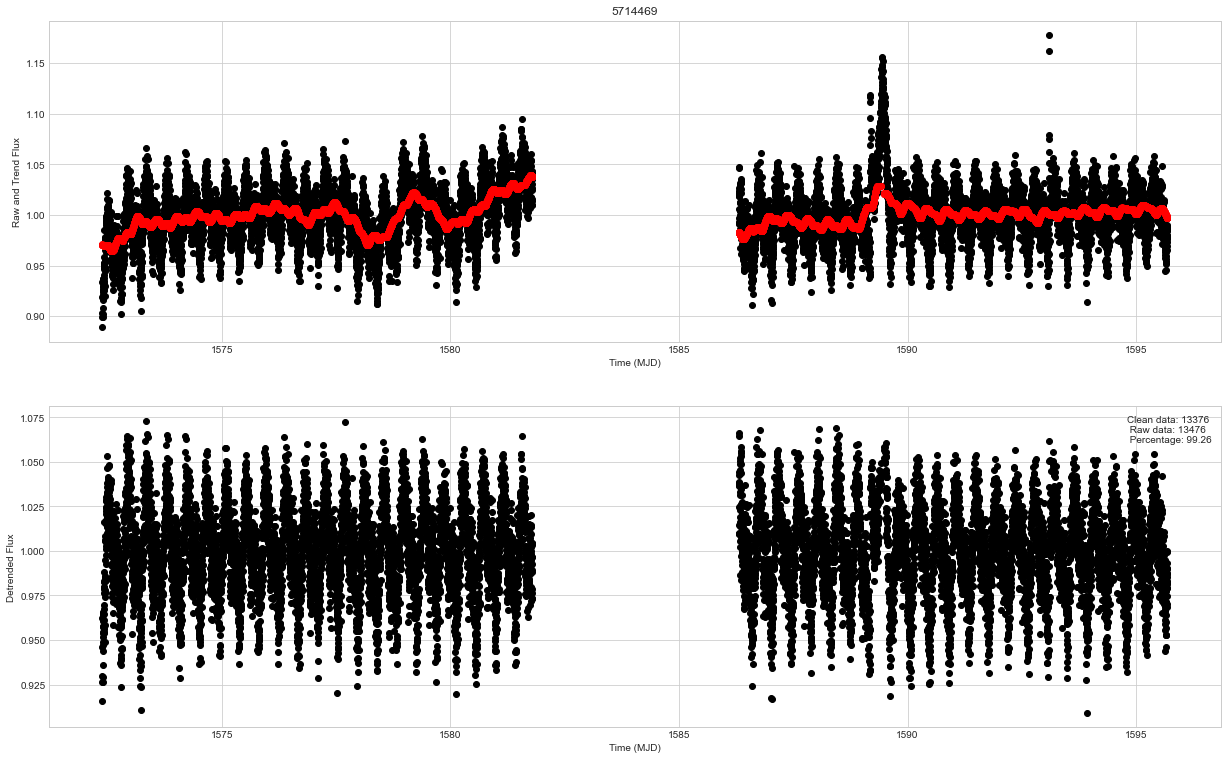

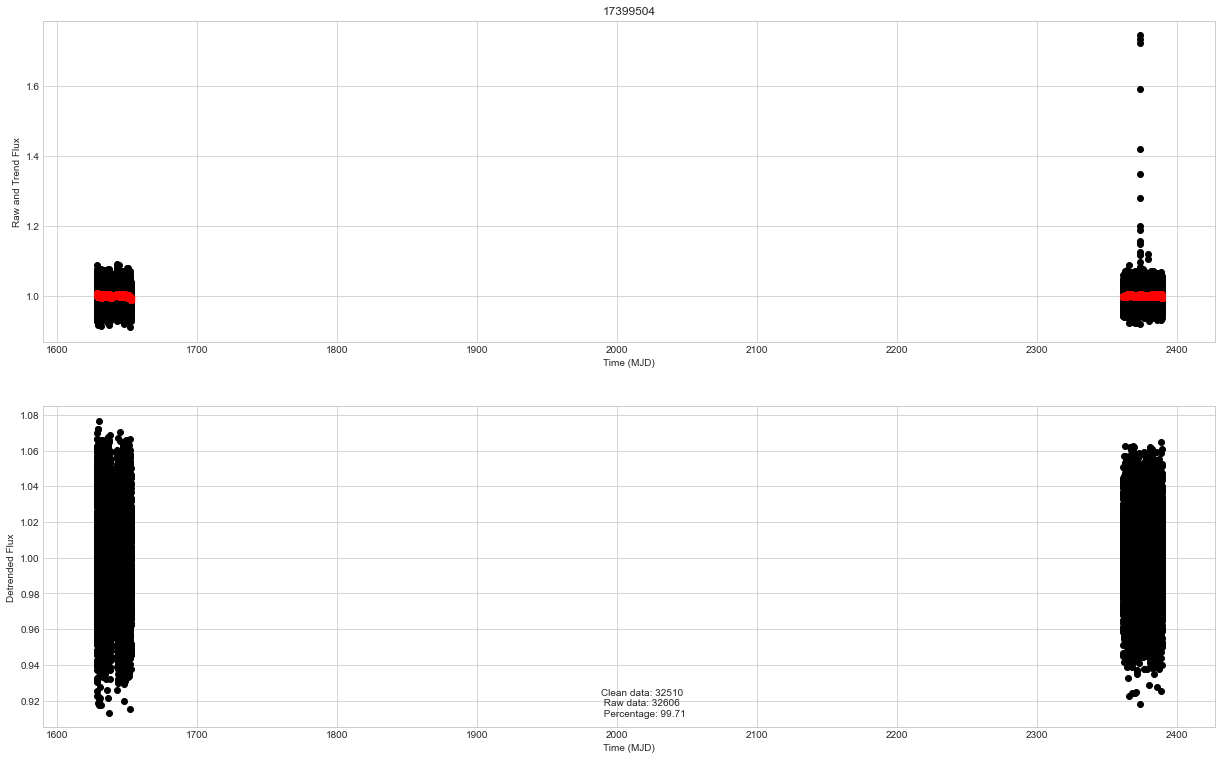

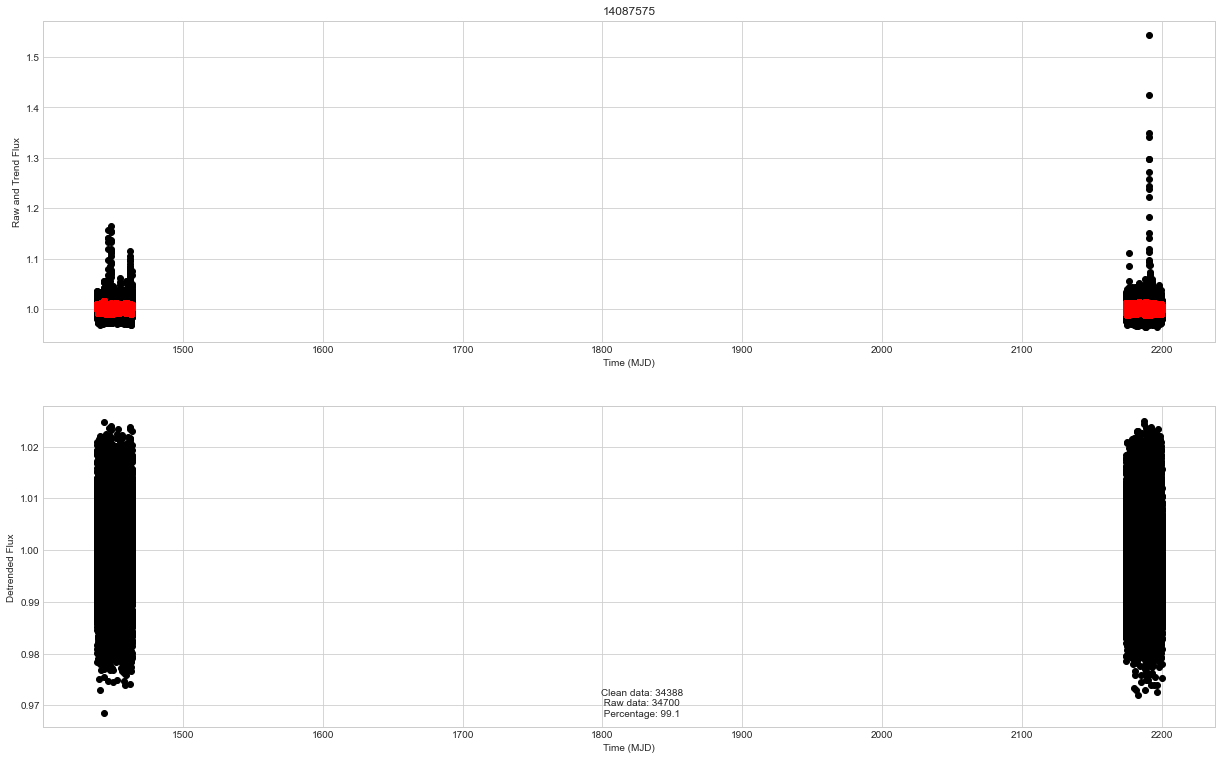

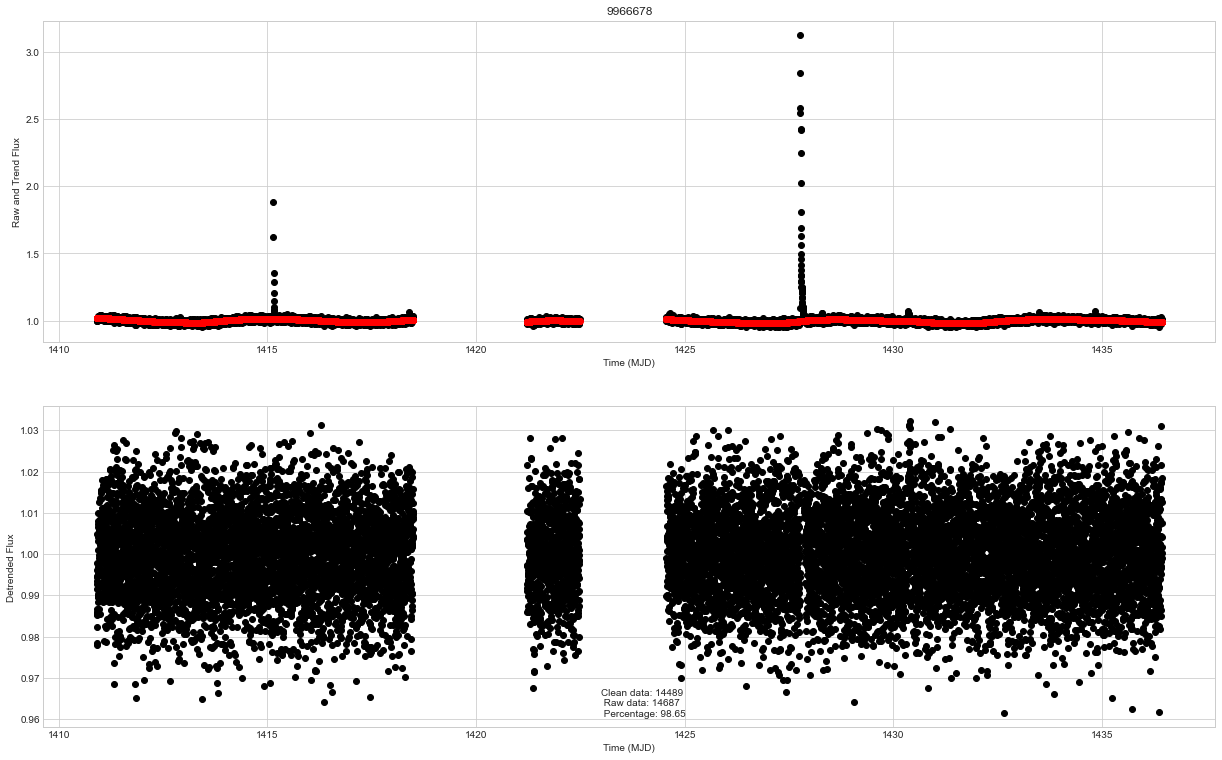

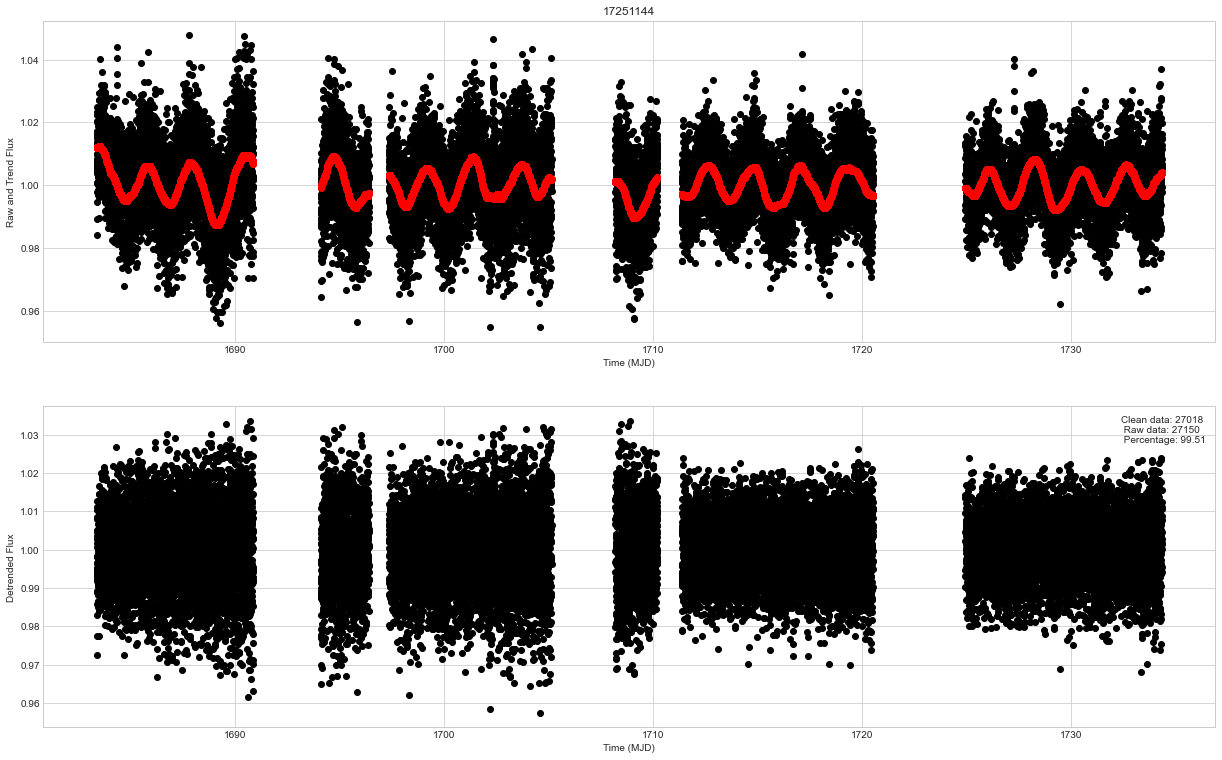

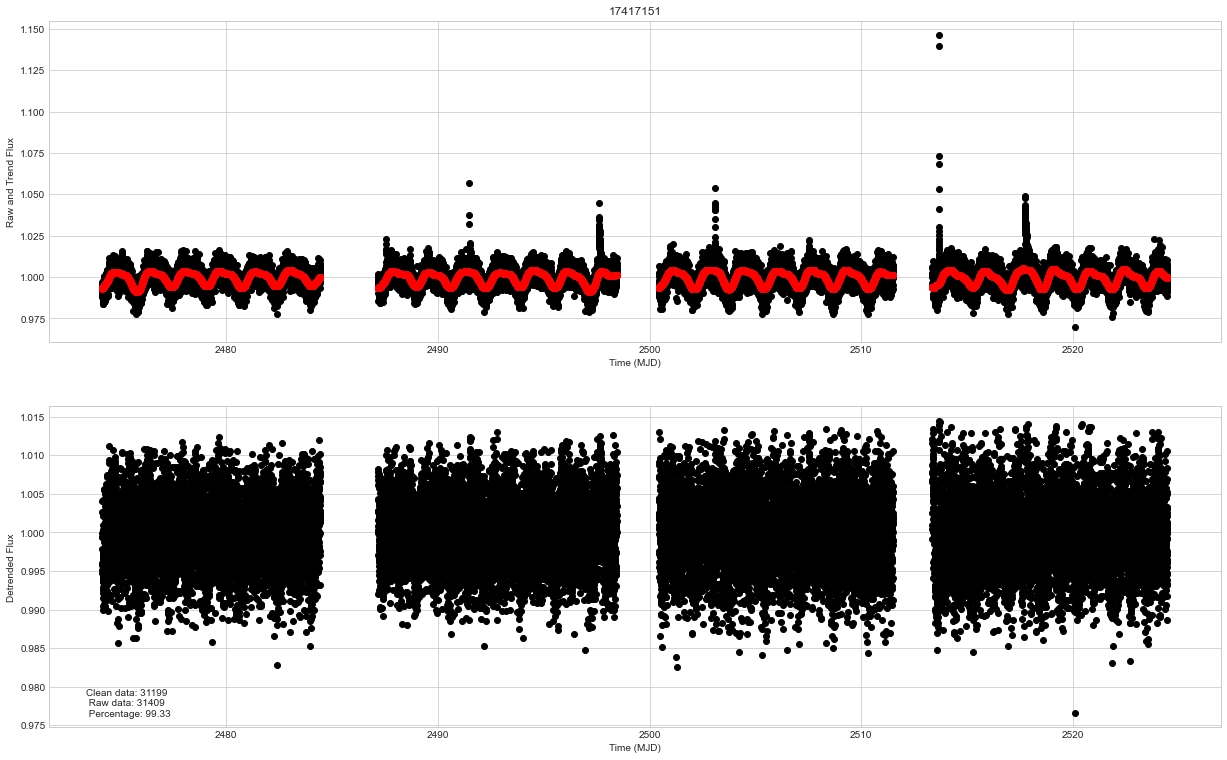

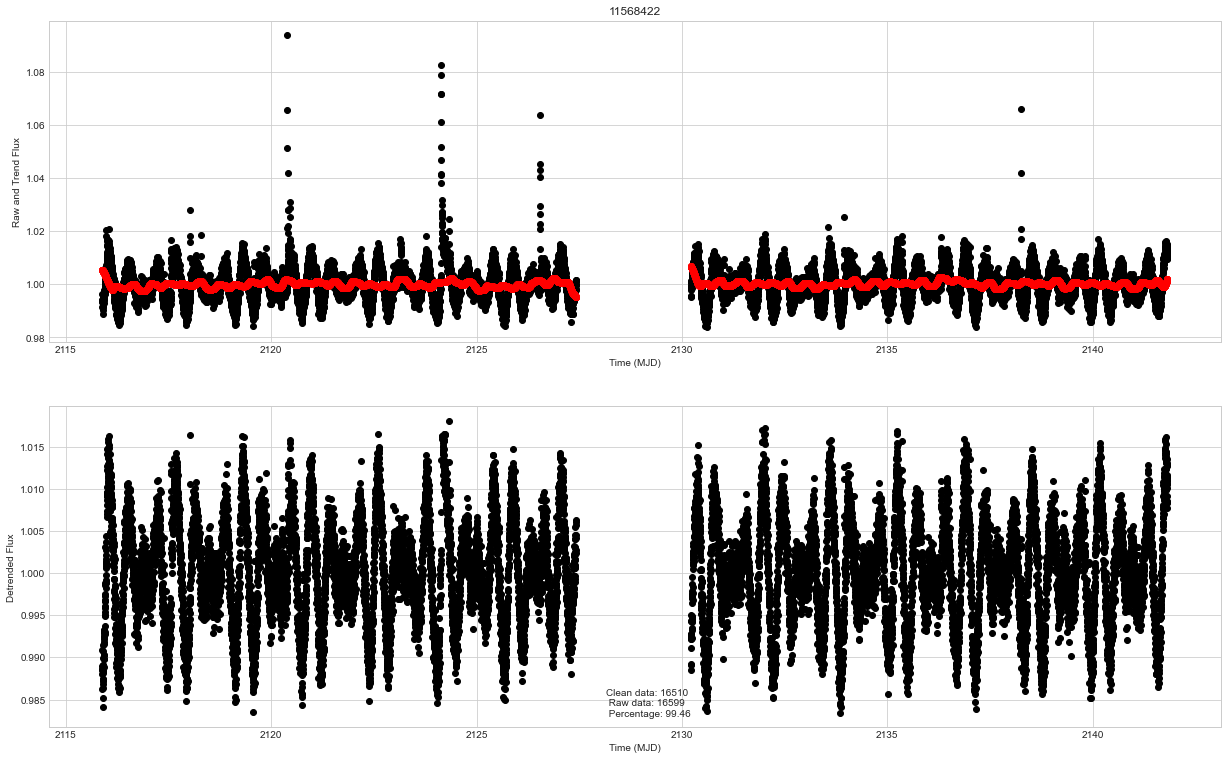

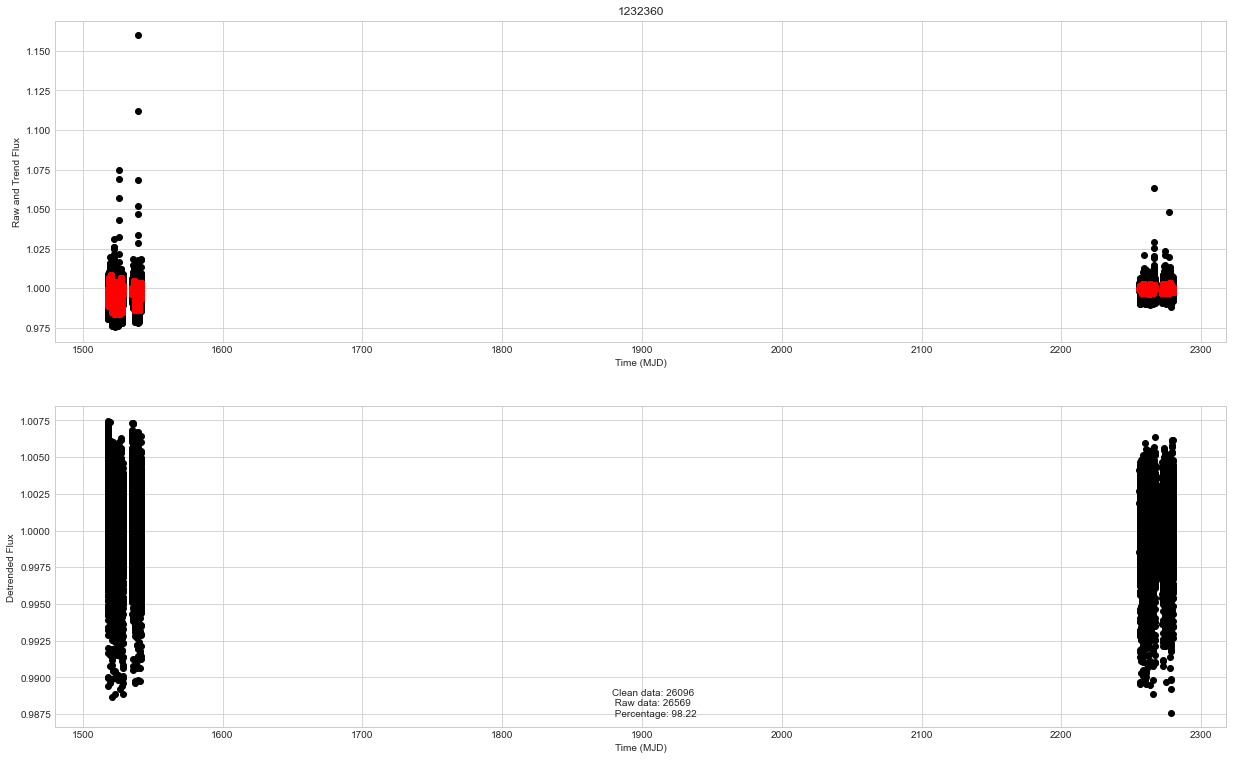

In [8]:
# Main

# loop through every file in list and run functions
for file in file_list:
    # read file
    tic_id = file[file.rfind('_')+1:-4]
    df = pd.read_csv(directory+'/' +file)

    # read columns, turn into numpy arrays
    clean_time = np.array(df['clean_time'])
    clean_flux = np.array(df['clean_flux'])
    trend_time = np.array(df['trend_time'])
    trend_flux = np.array(df['trend_flux'])

    # remove NaN
    mask = np.isfinite(clean_flux)
    clean_time = clean_time[mask]
    clean_flux = clean_flux[mask]
    trend_time = trend_time[mask]
    trend_flux = trend_flux[mask]


    # graph and save fig
    # set up two graphs, vertically aligned
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(21,13))

    # ax1
    ax1.plot(df['raw_time'], df['raw_flux'], 'o', color='black')
    ax1.plot(trend_time, trend_flux, 'o', color='red')
    # ax1 labels
    ax1.set_title(tic_id)
    ax1.set_xlabel('Time (MJD)')
    ax1.set_ylabel('Raw and Trend Flux')

    # ax2
    ax2.plot(clean_time, clean_flux, 'o', color='black')
    # ax2 labels
    ax2.set_xlabel('Time (MJD)')
    ax2.set_ylabel('Detrended Flux')

    # make a legend for ax2
    str = "Clean data: {} \n Raw data: {} \n Percentage: {}".format(len(clean_time), 
            len(df['raw_time']), round(len(clean_time)/len(df['raw_time'])*100, 2))
    plt.plot([], [], ' ', label=str)
    plt.legend()

    save_figure()